In [1]:
'''This script pulls in boston housing data, builds model,
   and then makes house price predictions on test data.'''
   
__author__ = 'Pavani Pisupati'


In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import joblib
%matplotlib inline

In [3]:
def load_data():
    '''loads boston housing dataset from sklearn datasets and returns a column named Dataframe '''
    boston_data = load_boston()
    data = pd.DataFrame(boston_data.data)
    data.columns = boston_data.feature_names
    data['HOUSE_PRICE'] = boston_data.target
    return data

def clean_data(raw_data):
    '''returns data that have target feature values greater than zero'''
    cleaned_data = raw_data[raw_data['HOUSE_PRICE']>0]
    return cleaned_data

def visualize_features_correlation(data):
    '''plot the heatmap to show the correlation between features'''
    correlation = data.corr()
    plt.figure(figsize=(12,10))
    return sns.heatmap(correlation, fmt='.1f', annot=True, cmap = 'Reds')

def preprocess_data(data):
    '''normalize the data as the dataset has wide range of values'''
    scaler = MinMaxScaler()
    data[['ZN','AGE','TAX','B','LSTAT']] = scaler.fit_transform(data[['ZN','AGE','TAX','B','LSTAT']])
    return data
    
def split_data(data):
    '''split the dataset into training and test data with 80% and 20% respectively'''
    target = data['HOUSE_PRICE']
    features = data.drop(['HOUSE_PRICE'], axis=1)
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
    return features_train, features_test, target_train, target_test

def train_model(model, f_train, t_train, f_test):
    '''train the model with the ML algorithm'''
    reg_model = model
    reg_model.fit(f_train, t_train)
    target_pred = reg_model.predict(f_test)
    return target_pred
    
def print_summary(t_test, t_pred):
    '''print the metrics of the model'''
    rmse_score = np.sqrt(metrics.mean_squared_error(t_test, t_pred))
    rsquared_score = metrics.r2_score(t_test, t_pred)
    print('RMSE score:', rmse_score)
    print('R2 score:', rsquared_score)
    print('\nScatter plot of y_test against y_pred:')
    sns.regplot(t_test, t_pred)
    
def save_as_pkl(model):
    '''save the model as a pickle file'''
    joblib.dump(model, 'boston_model.pkl')

In [4]:
#load and clean the data
data = load_data()
cleaned_data = clean_data(data)
cleaned_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSE_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


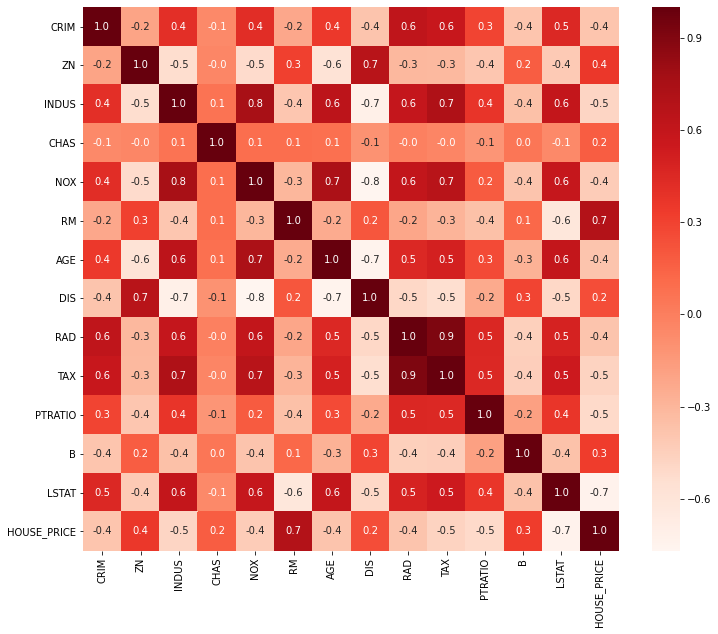

In [5]:
#Visualize the correlation between features
visualize_features_correlation(cleaned_data)

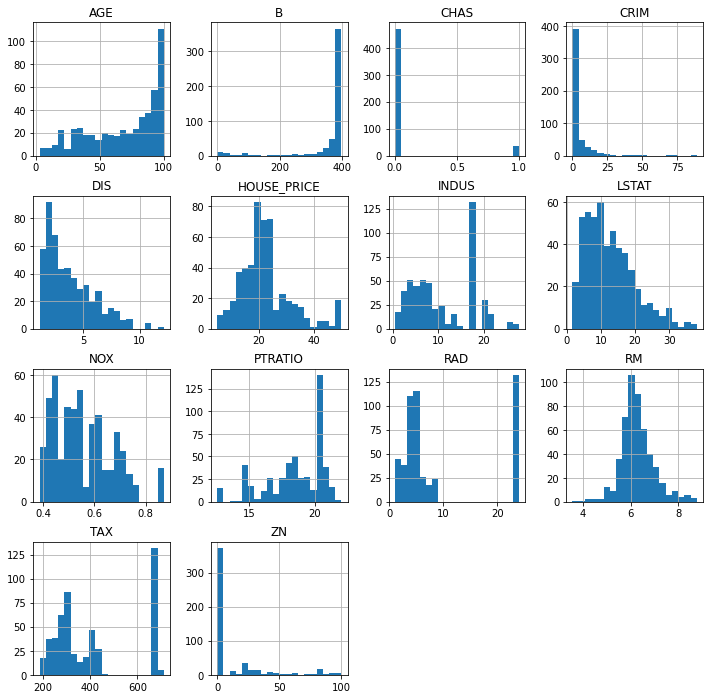

In [6]:
#the distribution of the features
cleaned_data.hist(figsize=(12,12), bins=20);

RMSE score: 4.961297847969318
R2 score: 0.6643501088379336

Scatter plot of y_test against y_pred:


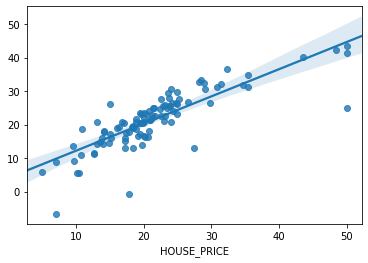

In [16]:
#create a Linear Regression Model
lr_model = LinearRegression()
f_train, f_test, t_train, t_test = split_data(cleaned_data)
scaled_f_train = preprocess_data(f_train)
scaled_f_test = preprocess_data(f_test)
t_pred = train_model(lr_model, scaled_f_train, t_train, scaled_f_test)
print_summary(t_test, t_pred)

In [17]:
save_as_pkl(lr_model)